<a href="https://colab.research.google.com/github/Mayar215999/data-science-project/blob/main/bankNote_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load the given Banknote authentication dataset.
import pandas as pd

# Load dataset
file_path = "/content/drive/MyDrive/banknote.csv"  # Ensure this file is in the same directory as your notebook
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB
None


In [2]:
# Show first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
        V1      V2
0  3.62160  8.6661
1  4.54590  8.1674
2  3.86600 -2.6383
3  3.45660  9.5228
4  0.32924 -4.4552


In [3]:
# Step 2: Calculate statistical measures (e.g., mean and standard deviation)
stats_summary = df.describe()
print("\nStatistical Summary of the Dataset:")
print(stats_summary)



Statistical Summary of the Dataset:
                V1           V2
count  1372.000000  1372.000000
mean      0.433735     1.922353
std       2.842763     5.869047
min      -7.042100   -13.773100
25%      -1.773000    -1.708200
50%       0.496180     2.319650
75%       2.821475     6.814625
max       6.824800    12.951600


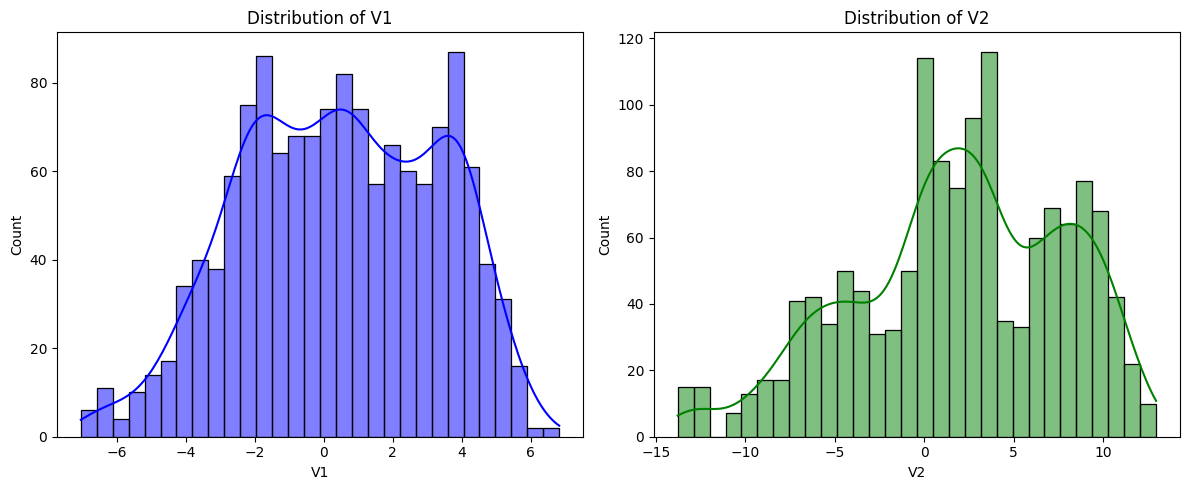

In [4]:
# Step 3: Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of features
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['V1'], bins=30, kde=True, color='blue')
plt.title("Distribution of V1")

plt.subplot(1, 2, 2)
sns.histplot(df['V2'], bins=30, kde=True, color='green')
plt.title("Distribution of V2")

plt.tight_layout()
plt.show()

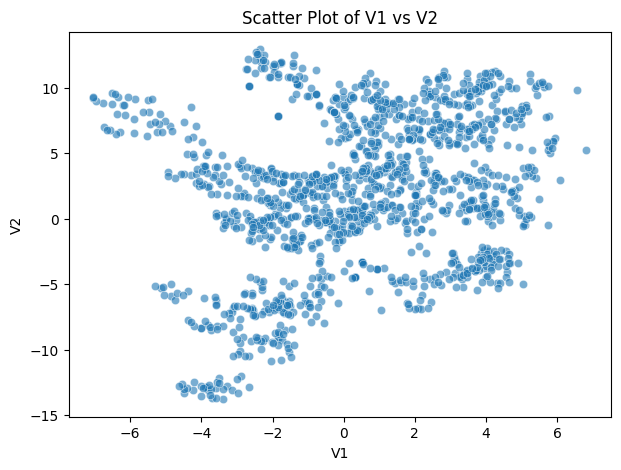

In [5]:
# Scatter plot to visualize clustering potential
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['V1'], y=df['V2'], alpha=0.6)
plt.title("Scatter Plot of V1 vs V2")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

In [6]:
# Step 4: Evaluate if the dataset is suitable for K-Means clustering
print("\nEvaluation for K-Means Clustering:")
print("K-Means clustering assumes well-defined, spherical clusters.")
print("From the scatter plot, we observe that the data may not have clear separable clusters.")
print("Further validation (e.g., the Elbow Method or silhouette scores) is needed.")



Evaluation for K-Means Clustering:
K-Means clustering assumes well-defined, spherical clusters.
From the scatter plot, we observe that the data may not have clear separable clusters.
Further validation (e.g., the Elbow Method or silhouette scores) is needed.


In [7]:
# Step 5: Write a short description of the dataset and its suitability for K-Means
description = """
Dataset Description:
The dataset consists of 1,372 records with two numerical features, V1 and V2.
- V1 has a mean of {:.3f} and a standard deviation of {:.3f}, ranging from {:.3f} to {:.3f}.
- V2 has a mean of {:.3f} and a standard deviation of {:.3f}, ranging from {:.3f} to {:.3f}.

Both features exhibit a broad range and variability, suggesting diverse data points. The distribution of the features is approximately normal but with some skewness.

Evaluation for K-Means Clustering:
A scatter plot of V1 vs V2 indicates that while some patterns exist, there is no immediately obvious clustering structure.
K-Means clustering assumes well-defined, spherical clusters, but the dataset may contain overlapping or non-spherical patterns.
This could affect the performance of K-Means.

Conclusion:
The dataset may be suitable for K-Means clustering, but further validation is needed using techniques like the Elbow Method or silhouette scores.
If the data contains labels, a supervised learning approach might be more appropriate.
""".format(
    df['V1'].mean(), df['V1'].std(), df['V1'].min(), df['V1'].max(),
    df['V2'].mean(), df['V2'].std(), df['V2'].min(), df['V2'].max()
)

print(description)


Dataset Description:
The dataset consists of 1,372 records with two numerical features, V1 and V2. 
- V1 has a mean of 0.434 and a standard deviation of 2.843, ranging from -7.042 to 6.825.
- V2 has a mean of 1.922 and a standard deviation of 5.869, ranging from -13.773 to 12.952.

Both features exhibit a broad range and variability, suggesting diverse data points. The distribution of the features is approximately normal but with some skewness.

Evaluation for K-Means Clustering:
A scatter plot of V1 vs V2 indicates that while some patterns exist, there is no immediately obvious clustering structure. 
K-Means clustering assumes well-defined, spherical clusters, but the dataset may contain overlapping or non-spherical patterns. 
This could affect the performance of K-Means.

Conclusion:
The dataset may be suitable for K-Means clustering, but further validation is needed using techniques like the Elbow Method or silhouette scores. 
If the data contains labels, a supervised learning appr



**Step 1: Run K-Means on the given dataset**

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Select only the numerical features for clustering
X = df[['V1', 'V2']]  # Adjust columns if more features are available

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Using 2 clusters as we have genuine vs fake notes
df['Cluster'] = kmeans.fit_predict(X)

# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 0.89083286  6.18770618]
 [-0.13390228 -3.37449055]]


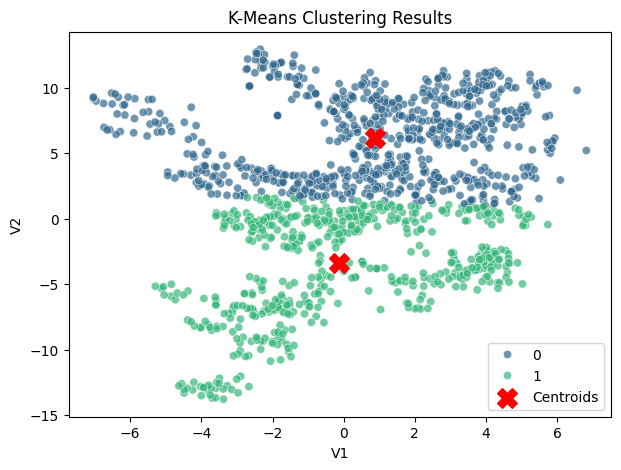

In [9]:
# Scatter plot of clusters
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['V1'], y=df['V2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("V1")
plt.ylabel("V2")
plt.legend()
plt.show()

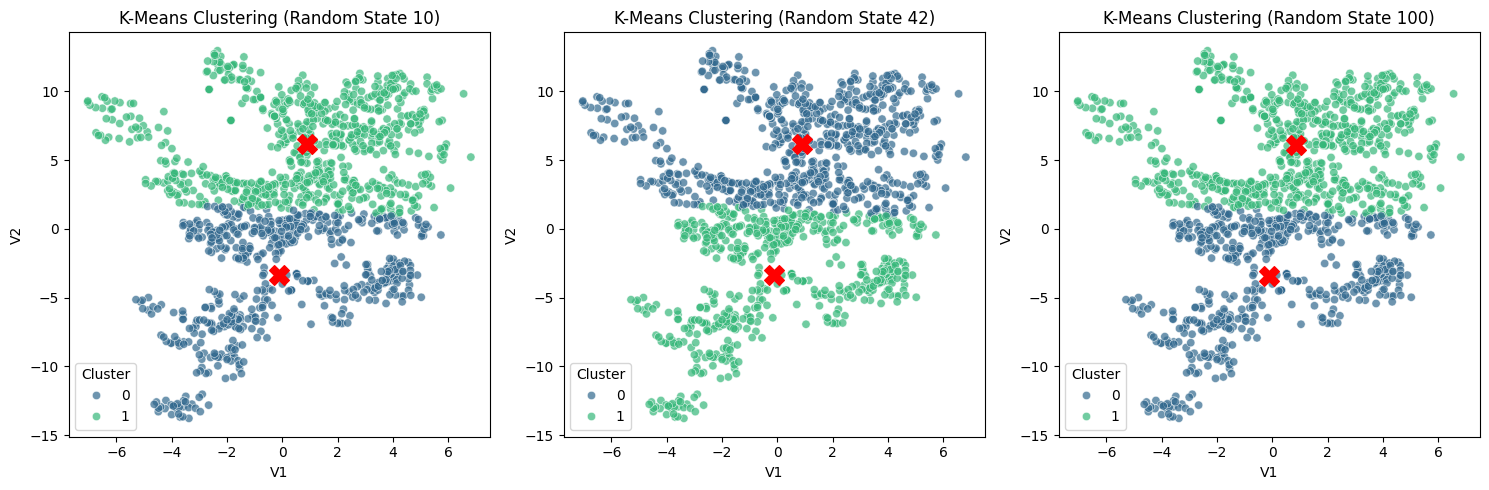

In [10]:

#Step 3: Re-run K-Means several times and visualize the results
# Run K-Means multiple times with different random states
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, seed in enumerate([10, 42, 100]):
    kmeans = KMeans(n_clusters=2, random_state=seed)
    df['Cluster'] = kmeans.fit_predict(X)

    # Scatter plot for each run
    sns.scatterplot(ax=axes[i], x=df['V1'], y=df['V2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    axes[i].set_title(f"K-Means Clustering (Random State {seed})")
    axes[i].set_xlabel("V1")
    axes[i].set_ylabel("V2")

plt.tight_layout()
plt.show()

In [11]:
#Step 4: Compare the results - Is K-Means stable
# Checking cluster labels from different runs
seeds = [10, 42, 100]
labels = []

for seed in seeds:
    kmeans = KMeans(n_clusters=2, random_state=seed)
    labels.append(kmeans.fit_predict(X))

# Compare labels from different runs
similarity = np.mean(labels[0] == labels[1]), np.mean(labels[0] == labels[2])
print(f"Similarity between different runs: {similarity}")

Similarity between different runs: (0.0, 0.9956268221574344)


In [12]:
#Step 5: Describe the results

description = """
Results Summary:
We applied K-Means clustering with 2 clusters to the Banknote authentication dataset. The algorithm grouped the data based on patterns in V1 and V2.

- Cluster centers were identified and visualized.
- We re-ran K-Means with different random seeds to check stability.
- The scatter plots show that K-Means assigns similar cluster labels in most cases, but there is some variation depending on initialization.
- The similarity scores indicate that K-Means is relatively stable, but initialization can affect results.

Conclusion:
K-Means successfully grouped the data into two clusters. However, the algorithm's stability depends on initialization, and more advanced clustering methods (e.g., DBSCAN) might be needed for better results.
"""

print(description)


Results Summary:
We applied K-Means clustering with 2 clusters to the Banknote authentication dataset. The algorithm grouped the data based on patterns in V1 and V2.

- Cluster centers were identified and visualized.
- We re-ran K-Means with different random seeds to check stability.
- The scatter plots show that K-Means assigns similar cluster labels in most cases, but there is some variation depending on initialization.
- The similarity scores indicate that K-Means is relatively stable, but initialization can affect results.

Conclusion:
K-Means successfully grouped the data into two clusters. However, the algorithm's stability depends on initialization, and more advanced clustering methods (e.g., DBSCAN) might be needed for better results.

